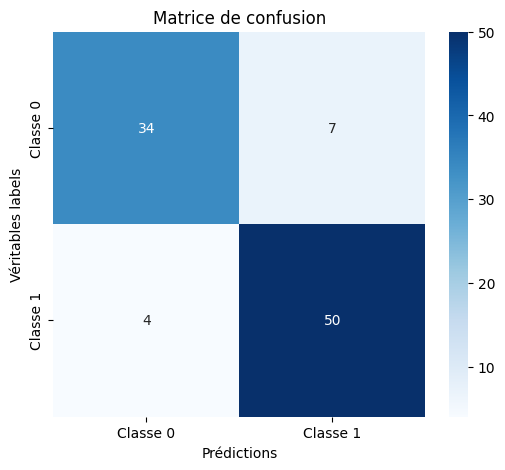

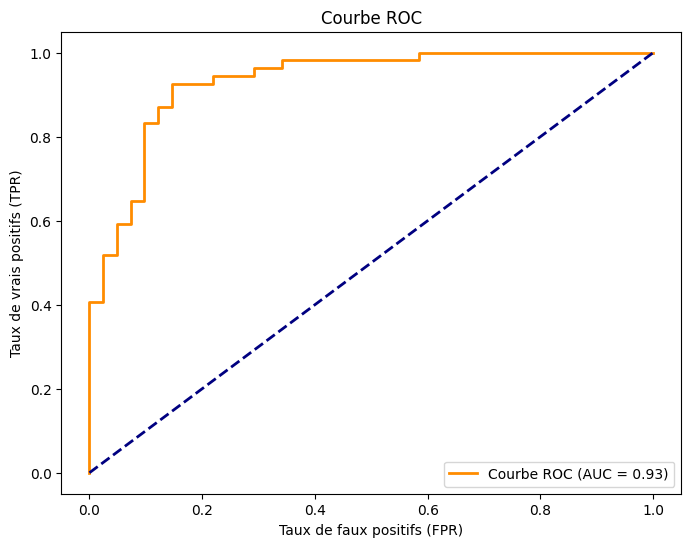

Accuracy: 0.8842105263157894
Classification Report :
               precision    recall  f1-score   support

    Classe 0       0.89      0.83      0.86        41
    Classe 1       0.88      0.93      0.90        54

    accuracy                           0.88        95
   macro avg       0.89      0.88      0.88        95
weighted avg       0.88      0.88      0.88        95



In [29]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

# Chargement des données d'entraînement à partir d'un fichier CSV
data_train = pd.read_csv('farms_train.csv', sep=";")

# Chargement des données de test à partir d'un fichier CSV
data_test = pd.read_csv('farms_test.csv', sep=",")

# Remplacement des virgules par des points dans les colonnes de type "object"
data_train = data_train.apply(lambda x: x.str.replace(',', '.', regex=False) if x.dtype == "object" else x)
data_test = data_test.apply(lambda x: x.str.replace(',', '.', regex=False) if x.dtype == "object" else x)

# Conversion de toutes les colonnes en numériques
data_train = data_train.apply(pd.to_numeric, errors='coerce')
data_test = data_test.apply(pd.to_numeric, errors='coerce')

# Séparation des caractéristiques (features) et des labels (target) pour l'entraînement et le test
X_train = data_train.drop(columns=['DIFF'])  # Remplacez 'DIFF' par le nom de la colonne de classe, si différent
y_train = data_train['DIFF']

X_test = data_test.drop(columns=['DIFF'])
y_test = data_test['DIFF']

# Mise à l'échelle des caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVM avec probabilité activée pour ROC
svm_model = SVC(kernel='linear', probability=True)

# Validation croisée pour évaluer la performance du modèle sur l'ensemble des données d'entraînement
svm_model.fit(X_train_scaled, y_train)

# Prédiction sur l'ensemble de test
y_pred = svm_model.predict(X_test_scaled)
y_prob = svm_model.predict_proba(X_test_scaled)[:, 1]  # Probabilité pour la classe positive

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion avec une heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédictions')
plt.ylabel('Véritables labels')
plt.title('Matrice de confusion')
plt.show()

# Calcul et affichage de la courbe ROC et de l'AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

# Évaluation des performances du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report :\n", classification_report(y_test, y_pred, target_names=['Classe 0', 'Classe 1']))
